In [2]:
import tensorflow as tf

In [3]:
if tf.config.experimental.list_physical_devices("GPU"):
    with tf.device("gpu:0"):
        print("GPU 사용 가능")
        v = tf.Variable(tf.random.normal([1000, 1000]))
        v = None  # v는 더이상 GPU 메모리를 사용하지 않음

GPU 사용 가능


In [4]:
import os 
os.environ["CUDA_DEVICE_ORDER"]="PCI_BUS_ID" 
os.environ["CUDA_VISIBLE_DEVICES"]="0"

In [5]:
import os

os.environ["CUDA_VISIBLE_DEVICES"]="0"

In [3]:
import torch

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

print('Device:', device)
print('Current cuda device:', torch.cuda.current_device())
print('Count of using GPUs:', torch.cuda.device_count())

Device: cuda
Current cuda device: 0
Count of using GPUs: 1


In [4]:
import tensorflow as tf

gpus = tf.config.experimental.list_physical_devices('GPU')
if gpus:
    # 특정 GPU에 1024GB 메모리만 할당하도록 제한
    try:
        tf.config.experimental.set_visible_devices(gpus[0], 'GPU')
        tf.config.experimental.set_virtual_device_configuration(
            gpus[0],
            [tf.config.experimental.VirtualDeviceConfiguration(memory_limit=1024)])
    except RuntimeError as e:
    # 프로그램 시작시에 가상 장치가 설정되어야만 합니다
        print(e)

In [7]:
with tf.device('/device:GPU:0'):

    model_base = InceptionResNetV2(weights='imagenet',
                       include_top=False,
                       input_shape=(75, 75, 3))
    model_base.summary()


NameError: name 'InceptionResNetV2' is not defined

In [1]:
import tensorflow as tf

print(tf.test.is_gpu_available())

print(tf.test.gpu_device_name())

print(tf.config.experimental.list_physical_devices(device_type='GPU'))

Instructions for updating:
Use `tf.config.list_physical_devices('GPU')` instead.
True
/device:GPU:0
[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]


In [1]:
import os, shutil

original_dataset_dir = 'F:/data/dogs-vs-cats/train' # 원본 데이터셋을 압축 해제한 디렉터리 경로

base_dir = 'F:/data/dogs-vs-cats_small'

if os.path.exists(base_dir):  # 반복적인 실행을 위해 디렉토리를 삭제합니다.
    shutil.rmtree(base_dir) # 존재한다면 지운다.

os.mkdir(base_dir) # make directory의 약어

# 훈련, 검증, 테스트 분할을 위한 디렉터리
train_dir = os.path.join(base_dir, 'train') # os.path.join : 인수에 전달된 2개의 문자열을 결합하여, 1개의 경로로 할 수 있다.
os.mkdir(train_dir)
validation_dir = os.path.join(base_dir, 'validation')
os.mkdir(validation_dir)
test_dir = os.path.join(base_dir, 'test')
os.mkdir(test_dir)

train_cats_dir = os.path.join(train_dir, 'cats') # 훈련용 고양이 사진 디렉터리
os.mkdir(train_cats_dir)

train_dogs_dir = os.path.join(train_dir, 'dogs') # 훈련용 강아지 사진 디렉터리
os.mkdir(train_dogs_dir)

validation_cats_dir = os.path.join(validation_dir, 'cats') # 검증용 고양이 사진 디렉터리
os.mkdir(validation_cats_dir)

validation_dogs_dir = os.path.join(validation_dir, 'dogs') # 검증용 강아지 사진 디렉터리
os.mkdir(validation_dogs_dir)

test_cats_dir = os.path.join(test_dir, 'cats') # 테스트용 고양이 사진 디렉터리
os.mkdir(test_cats_dir)

test_dogs_dir = os.path.join(test_dir, 'dogs') # 테스트용 강아지 사진 디렉터리
os.mkdir(test_dogs_dir)

fnames = ['cat.{}.jpg'.format(i) for i in range(1000)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(train_cats_dir, fname)
    shutil.copyfile(src, dst) # copy data from src to dst

fnames = ['cat.{}.jpg'.format(i) for i in range(1000, 1500)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(validation_cats_dir, fname)
    shutil.copyfile(src, dst)

fnames = ['cat.{}.jpg'.format(i) for i in range(1500, 2000)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(test_cats_dir, fname)
    shutil.copyfile(src, dst)
    
    
fnames = ['dog.{}.jpg'.format(i) for i in range(1000)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(train_dogs_dir, fname)
    shutil.copyfile(src, dst) # copy data from src to dst

fnames = ['dog.{}.jpg'.format(i) for i in range(1000, 1500)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(validation_dogs_dir, fname)
    shutil.copyfile(src, dst)

fnames = ['dog.{}.jpg'.format(i) for i in range(1500, 2000)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(test_dogs_dir, fname)
    shutil.copyfile(src, dst)

print('훈련용 고양이 이미지 전체 개수:', len(os.listdir(train_cats_dir))) 
print('훈련용 고양이 이미지 전체 개수:', len(os.listdir(validation_cats_dir))) 
print('훈련용 고양이 이미지 전체 개수:', len(os.listdir(test_cats_dir))) 
print('훈련용 강아지 이미지 전체 개수:', len(os.listdir(train_dogs_dir))) 
print('훈련용 강아지 이미지 전체 개수:', len(os.listdir(validation_dogs_dir))) 
print('훈련용 강아지 이미지 전체 개수:', len(os.listdir(test_dogs_dir))) 

훈련용 고양이 이미지 전체 개수: 1000
훈련용 고양이 이미지 전체 개수: 500
훈련용 고양이 이미지 전체 개수: 500
훈련용 강아지 이미지 전체 개수: 1000
훈련용 강아지 이미지 전체 개수: 500
훈련용 강아지 이미지 전체 개수: 500


In [3]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(
    rotation_range=20,
    width_shift_range=0.1,
    height_shift_range=0.1,
    shear_range=0.1,
    zoom_range=0.1,
    horizontal_flip=True,
    fill_mode='nearest'
)

In [9]:
os.listdir(train_cats_dir)

['cat.0.jpg',
 'cat.1.jpg',
 'cat.10.jpg',
 'cat.100.jpg',
 'cat.101.jpg',
 'cat.102.jpg',
 'cat.103.jpg',
 'cat.104.jpg',
 'cat.105.jpg',
 'cat.106.jpg',
 'cat.107.jpg',
 'cat.108.jpg',
 'cat.109.jpg',
 'cat.11.jpg',
 'cat.110.jpg',
 'cat.111.jpg',
 'cat.112.jpg',
 'cat.113.jpg',
 'cat.114.jpg',
 'cat.115.jpg',
 'cat.116.jpg',
 'cat.117.jpg',
 'cat.118.jpg',
 'cat.119.jpg',
 'cat.12.jpg',
 'cat.120.jpg',
 'cat.121.jpg',
 'cat.122.jpg',
 'cat.123.jpg',
 'cat.124.jpg',
 'cat.125.jpg',
 'cat.126.jpg',
 'cat.127.jpg',
 'cat.128.jpg',
 'cat.129.jpg',
 'cat.13.jpg',
 'cat.130.jpg',
 'cat.131.jpg',
 'cat.132.jpg',
 'cat.133.jpg',
 'cat.134.jpg',
 'cat.135.jpg',
 'cat.136.jpg',
 'cat.137.jpg',
 'cat.138.jpg',
 'cat.139.jpg',
 'cat.14.jpg',
 'cat.140.jpg',
 'cat.141.jpg',
 'cat.142.jpg',
 'cat.143.jpg',
 'cat.144.jpg',
 'cat.145.jpg',
 'cat.146.jpg',
 'cat.147.jpg',
 'cat.148.jpg',
 'cat.149.jpg',
 'cat.15.jpg',
 'cat.150.jpg',
 'cat.151.jpg',
 'cat.152.jpg',
 'cat.153.jpg',
 'cat.154.jpg',
 '

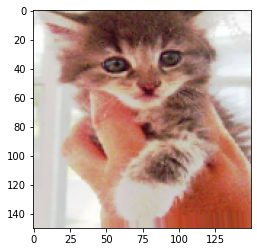

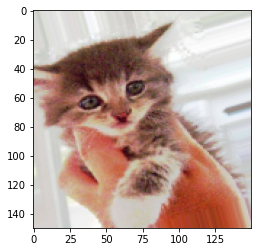

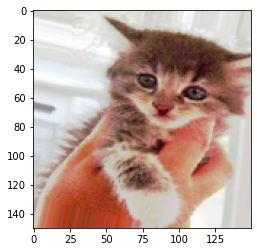

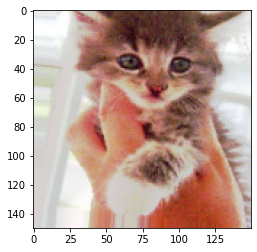

In [12]:
from tensorflow.keras.preprocessing import image # 이미지 전처리 유틸리티 모듈 
import matplotlib.pyplot as plt

fnames = sorted([os.path.join(train_cats_dir, fname) for fname in os.listdir(train_cats_dir)])

img_path = fnames[3] # 증식할 이미지를 선택

img = image.load_img(img_path, target_size=(150, 150))

x = image.img_to_array(img) # (150, 150, 3) 크기의 넘파이 배열로 변환
x = x.reshape((1,) + x.shape) # (1, 150, 150, 3) 크기로 변환 

# 랜덤하게 변환된 이미지 배치를 생성한다.
# 무한 반복되기 때문에 어느 지점에서 중지해야 한다.
i=0
for batch in datagen.flow(x, batch_size=1):
    plt.figure(i) 
    imgplot = plt.imshow(image.array_to_img(batch[0]))
    i += 1
    if i % 4 == 0:
        break
plt.show()
    
    

In [14]:
from tensorflow.keras import models, layers
from tensorflow.keras import optimizers

model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu',
                        input_shape=(150,150,3)))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Flatten())
model.add(layers.Dropout(0.5))
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy',
              optimizer=optimizers.RMSprop(lr=1e-4),
              metrics=['accuracy'])

In [15]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 15, 15, 128)      

In [25]:
from tensorflow.keras.utils import plot_model

plot_model(model)

('Failed to import pydot. You must `pip install pydot` and install graphviz (https://graphviz.gitlab.io/download/), ', 'for `pydotprint` to work.')


In [35]:
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,)

test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    train_dir, # 타깃 디렉터리
    target_size=(150, 150), # 모든 이미지를 150x150크기로 바꾼다.
    batch_size=32,
    class_mode='binary' # binary_crossentropy 손실을 사용하기 대문에 이진 레이블을 만들어야 한다.
)

validation_generator = test_datagen.flow_from_directory(
    validation_dir, # 타깃 디렉터리
    target_size=(150, 150), # 모든 이미지를 150x150크기로 바꾼다.
    batch_size=32,
    class_mode='binary' # binary_crossentropy 손실을 사용하기 대문에 이진 레이블을 만들어야 한다.
)

history = model.fit_generator(
    train_generator,
    steps_per_epoch=100,
    epochs=100,
    validation_data=validation_generator,
    validation_steps=50
)

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.
Epoch 1/30
100/100 [==============================] - 20s 194ms/step - loss: 0.6764 - accuracy: 0.5885 - val_loss: 0.6530 - val_accuracy: 0.6260


In [32]:
model.save('f:/data/dogs-vs-cats/cats_and_dogs_small_2.h5')

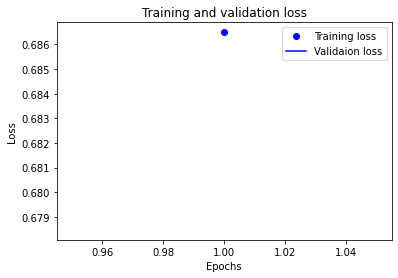

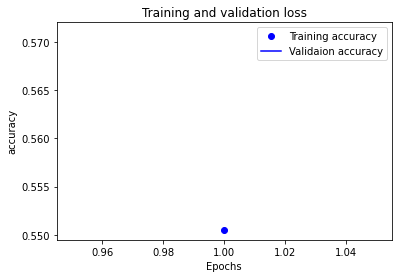

In [33]:
# 훈련의 정확도와 손실 그래프 그리기
import matplotlib.pyplot as plt

history.history.keys()
# dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(loss) + 1)

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validaion loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']

plt.plot(epochs, accuracy, 'bo', label='Training accuracy')
plt.plot(epochs, val_accuracy, 'b', label='Validaion accuracy')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('accuracy')
plt.legend()

plt.show()